# About Dataset

The "Online Retail Transaction" dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.

# Column Descriptors

1. StockCode: A code used to identify the product that was purchased

2. Description: A brief description of the product that was purchased

3. Quantity: The quantity of the product that was purchased

4. InvoiceDate: The date and time that the purchase was made

5. UnitPrice: The price of one unit of the product that was purchased

6. CustomerID: The unique identifier for the customer who made the purchase

7. Country: The country where the customer who made the purchase is located

# Importing Important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import datetime
from wordcloud import WordCloud
warnings.filterwarnings('ignore' )
import plotly.express as px
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18

# Reading Data Csv File

In [3]:
df_1 = pd.read_csv("/Online Retail.csv")

In [4]:
# top 5 rows
df_1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
# last 5 rows
df_1.tail()

InvoiceNo StockCode                    Description  Quantity  \
46758    540359    84985A  SET OF 72 GREEN PAPER DOILIES       2.0   
46759    540359    84985A  SET OF 72 GREEN PAPER DOILIES       5.0   
46760    540359     21915         RED  HARMONICA IN BOX       12.0   
46761    540359     22133      PINK LOVE HEART SHAPE CUP      10.0   
46762    540359       221                            NaN       NaN   

               InvoiceDate  UnitPrice  CustomerID         Country  
46758  2011-01-06 15:29:00       1.45     18041.0  United Kingdom  
46759  2011-01-06 15:29:00       1.45     18041.0  United Kingdom  
46760  2011-01-06 15:29:00       1.25     18041.0  United Kingdom  
46761  2011-01-06 15:29:00       0.85     18041.0  United Kingdom  
46762                  NaN        NaN         NaN             NaN

In [6]:
# total no of columns and rows
print(f"Total No of Rows = {df_1.shape[0]} and Columns = {df_1.shape[1]}")


Total No of Rows = 46763 and Columns = 8


* Total 541909 rows and 8 columns are there

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46763 entries, 0 to 46762
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    46763 non-null  object 
 1   StockCode    46763 non-null  object 
 2   Description  46621 non-null  object 
 3   Quantity     46762 non-null  float64
 4   InvoiceDate  46762 non-null  object 
 5   UnitPrice    46762 non-null  float64
 6   CustomerID   46762 non-null  float64
 7   Country      46762 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.9+ MB


In [8]:
# checking duplicated values
df_1.duplicated().sum()

511

In [9]:
print(f"{df_1.duplicated().mean()*100}%")

1.0927442636272267%


* There is duplicated values is present which around 0.97% 


In [10]:
# droping Duplicated values
df_1.drop_duplicates(inplace = True)

In [11]:
cat_cols = df_1.select_dtypes(include=["object"]).columns
num_cols = df_1.select_dtypes(include=['int','float']).columns

# 3) Data Cleaning

# 3.1) Handling missing values and other anomolies

* Checking for Missing values in DataFrame using is null function

In [12]:
df_1.isnull().sum()

InvoiceNo        0
StockCode        0
Description    142
Quantity         1
InvoiceDate      1
UnitPrice        1
CustomerID       1
Country          1
dtype: int64

In [13]:
df_1.isnull().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.003070
Quantity       0.000022
InvoiceDate    0.000022
UnitPrice      0.000022
CustomerID     0.000022
Country        0.000022
dtype: float64

In [14]:
df_1.isnull().mean().sort_values(ascending=False)

Description    0.003070
Quantity       0.000022
InvoiceDate    0.000022
UnitPrice      0.000022
CustomerID     0.000022
Country        0.000022
InvoiceNo      0.000000
StockCode      0.000000
dtype: float64

In [15]:
(df_1.isnull().mean().sort_values(ascending=False)[0:3])*100

Description    0.307014
Quantity       0.002162
InvoiceDate    0.002162
dtype: float64

<Axes: >

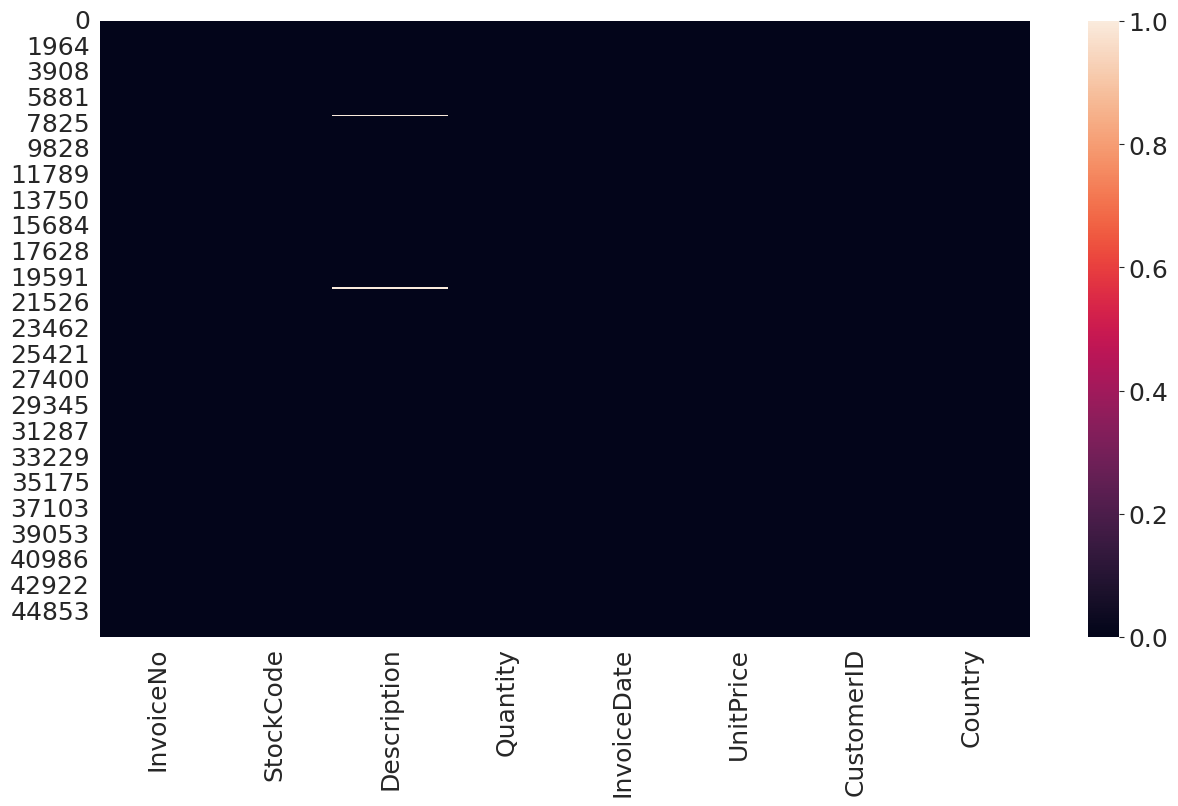

In [16]:
sns.heatmap(df_1.isna())

In [17]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.figure(figsize=(10,6))
        plt.show()
        
    else:
        print('No NAs found')

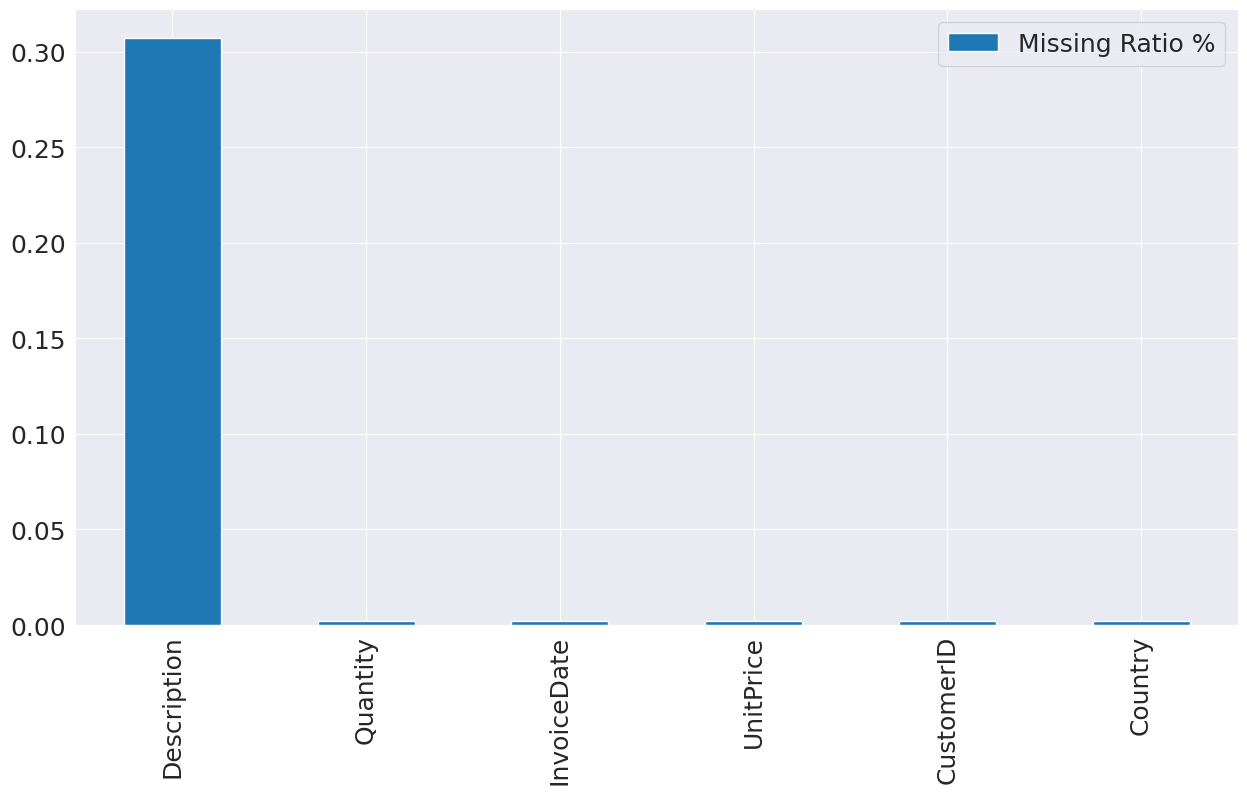

<Figure size 1000x600 with 0 Axes>

In [18]:
plot_nas(df_1)

1. As we have almost 0.27% Null Values in "Description" Columns
2. we can drop null values

In [19]:
df_1.dropna(inplace = True)

In [20]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df_1.columns:
    variables.append(item)
    dtypes.append(df_1[item].dtype)
    count.append(len(df_1[item]))
    unique.append(len(df_1[item].unique()))
    missing.append(df_1[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    

output.sort_values("missing",ascending=False).reset_index(drop=True)
output

variable    dtype  count  unique  missing
0    InvoiceNo   object  46110    2058        0
1    StockCode   object  46110    2840        0
2  Description   object  46110    2799        0
3     Quantity  float64  46110     195        0
4  InvoiceDate   object  46110    1855        0
5    UnitPrice  float64  46110     311        0
6   CustomerID  float64  46110     992        0
7      Country   object  46110      24        0

## 3.2) Checking Unique values

* count unique values in each columns

In [21]:
df_1.nunique()

InvoiceNo      2058
StockCode      2840
Description    2799
Quantity        195
InvoiceDate    1855
UnitPrice       311
CustomerID      992
Country          24
dtype: int64

In [22]:
for i in df_1.columns:
    print(f"------------{i}-----------------------")
    print(df_1[i].value_counts())
    print("-----------------------------------------")

------------InvoiceNo-----------------------
537434     675
538071     652
538349     620
537638     601
537237     597
          ... 
C539059      1
C539065      1
C539068      1
539611       1
C538632      1
Name: InvoiceNo, Length: 2058, dtype: int64
-----------------------------------------
------------StockCode-----------------------
85123A    264
22423     212
22834     180
22086     173
22111     167
         ... 
21736       1
84614A      1
90010A      1
90050       1
47518F      1
Name: StockCode, Length: 2840, dtype: int64
-----------------------------------------
------------Description-----------------------
WHITE HANGING HEART T-LIGHT HOLDER    269
REGENCY CAKESTAND 3 TIER              211
HAND WARMER BABUSHKA DESIGN           180
PAPER CHAIN KIT 50'S CHRISTMAS        173
SCOTTIE DOG HOT WATER BOTTLE          167
                                     ... 
JARDIN ETCHED GLASS BUTTER DISH         1
SET OF 4 GREEN CAROUSEL COASTERS        1
VINTAGE BLUE TINSEL REEL            

* Qunatity Columns have negative value
* Unit Price have Negative values


# 3.3) Apply Prepocessing Technique to clean Unit Price Column

In [23]:
df_1[df_1["UnitPrice"]<=0]

InvoiceNo StockCode                   Description  Quantity  \
6391     536941     22734                        amazon      20.0   
6392     536942     22139                        amazon      15.0   
7313     537032     21275                             ?     -30.0   
9302     537197     22841  ROUND CAKE TIN VINTAGE GREEN       1.0   
13217    537425    84968F                         check     -20.0   
...         ...       ...                           ...       ...   
42564    540010     22501    reverse 21/5/10 adjustment    -100.0   
42566    540012     22502    reverse 21/5/10 adjustment    -100.0   
43662    540100     22837                             ?    -106.0   
46579    540355     20724   RED RETROSPOT CHARLOTTE BAG       1.0   
46673    540356     20724   RED RETROSPOT CHARLOTTE BAG       1.0   

               InvoiceDate  UnitPrice  CustomerID         Country  
6391   2010-12-03 12:08:00        0.0     15287.0  United Kingdom  
6392   2010-12-03 12:08:00        0.0     15287.0  United Kingdom  
7313   2010-12-03 16:50:00        0.0     15287.0  United Kingdom  
9302   2010-12-05 14:02:00        0.0     12647.0         Germany  
13217  2010-12-06 15:35:00        0.0     15287.0  United Kingdom  
...                    ...        ...         ...             ...  
42564  2011-01-04 11:13:00        0.0     15287.0  United Kingdom  
42566  2011-01-04 11:14:00        0.0     15287.0  United Kingdom  
43662  2011-01-04 16:53:00        0.0     15287.0  United Kingdom  
46579  2011-01-06 15:11:00        0.0     15287.0  United Kingdom  
46673  2011-01-06 15:12:00        0.0     15287.0  United Kingdom  

[151 rows x 8 columns]

In [24]:
df_1[df_1["UnitPrice"]<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

* droping negative Price

In [25]:
# this data frame contain non negative values and greater than 0
df_1 = df_1[df_1['UnitPrice'] > 0]

In [26]:
df_1[df_1['UnitPrice']==0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [27]:
df_1[df_1['UnitPrice']<=0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

* 1058 rows are droped which contain zero and negative values

# 3.4) Applying PreProcessing Technique on Quantity Columns

In [28]:
df_1[df_1['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141     C536379         D                          Discount      -1.0   
154     C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS      -1.0   
235     C536391     22556    PLASTERS IN TIN CIRCUS PARADE      -12.0   
236     C536391     21984  PACK OF 12 PINK PAISLEY TISSUES      -24.0   
237     C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES      -24.0   
...         ...       ...                               ...       ...   
45913   C540307         M                            Manual      -2.0   
45914   C540307     21644   ASSORTED TUTTI FRUTTI HEART BOX     -24.0   
45915   C540307     21645   ASSORTED TUTTI FRUTTI ROUND BOX     -24.0   
45954   C540346     22077            6 RIBBONS RUSTIC CHARM      -4.0   
45983   C540347     22191            IVORY DINER WALL CLOCK      -6.0   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
45913  2011-01-06 12:58:00      21.95     15823.0  United Kingdom  
45914  2011-01-06 12:58:00       1.25     15823.0  United Kingdom  
45915  2011-01-06 12:58:00       1.65     15823.0  United Kingdom  
45954  2011-01-06 13:41:00       1.65     12471.0         Germany  
45983  2011-01-06 13:56:00       8.50     16424.0  United Kingdom  

[831 rows x 8 columns]

In [29]:
df_1[df_1['Quantity']==0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

* Total 9725 values contain Negative values
* No Null values is present

In [30]:
df_1["Quantity"] = df_1['Quantity'].abs()

In [31]:
df_1[df_1['Quantity']<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

* There is no Negative values present in Quantity column

# 3.5) Applying PreProcessing Technique on InvoiceDate Columns

In [34]:
df_1['Year'] = pd.to_datetime(df_1["InvoiceDate"]).dt.year
df_1['Month'] = pd.to_datetime(df_1["InvoiceDate"]).dt.month
df_1['Month_Name_year_wise'] = pd.to_datetime(df_1["InvoiceDate"]).dt.month_name()
df_1['Week'] = pd.to_datetime(df_1["InvoiceDate"]).dt.week
df_1['day'] = pd.to_datetime(df_1["InvoiceDate"]).dt.day
df_1['Weekday'] = pd.to_datetime(df_1["InvoiceDate"]).dt.weekday
df_1["Day_Name"] = pd.to_datetime(df_1["InvoiceDate"]).dt.day_name()


In [35]:
# Create new column with time interval labels
df_1['Time'] = pd.to_datetime(df_1['InvoiceDate']).dt.hour
df_1['Time of Day'] = ['Early Morning' if x < 6 
                     else ('Morning' if x < 12 
                           else ('Noon' if x < 14 
                                 else ('Afternoon' if x < 18 
                                       else ('Evening' if x < 22 else 'Night')))) for x in df_1['Time']]

# 3.6) Create a Sales Columns

In [36]:
# Create column of sales 
# Sales = qty * price
df_1['Sales'] = df_1['Quantity'] * df_1['UnitPrice']
df_1['Sales'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Sales, dtype: float64

In [37]:
df_1

InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1        536365     71053                  WHITE METAL LANTERN       6.0   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...         ...       ...                                  ...       ...   
46757    540359     21080  SET/20 RED RETROSPOT PAPER NAPKINS       16.0   
46758    540359    84985A        SET OF 72 GREEN PAPER DOILIES       2.0   
46759    540359    84985A        SET OF 72 GREEN PAPER DOILIES       5.0   
46760    540359     21915               RED  HARMONICA IN BOX       12.0   
46761    540359     22133            PINK LOVE HEART SHAPE CUP      10.0   

               InvoiceDate  UnitPrice  CustomerID         Country  Year  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
46757  2011-01-06 15:29:00       0.85     18041.0  United Kingdom  2011   
46758  2011-01-06 15:29:00       1.45     18041.0  United Kingdom  2011   
46759  2011-01-06 15:29:00       1.45     18041.0  United Kingdom  2011   
46760  2011-01-06 15:29:00       1.25     18041.0  United Kingdom  2011   
46761  2011-01-06 15:29:00       0.85     18041.0  United Kingdom  2011   

       Sales  Month Month_Name_year_wise  Week  day  Weekday   Day_Name  Time  \
0      15.30     12             December    48    1        2  Wednesday     8   
1      20.34     12             December    48    1        2  Wednesday     8   
2      22.00     12             December    48    1        2  Wednesday     8   
3      20.34     12             December    48    1        2  Wednesday     8   
4      20.34     12             December    48    1        2  Wednesday     8   
...      ...    ...                  ...   ...  ...      ...        ...   ...   
46757  13.60      1              January     1    6        3   Thursday    15   
46758   2.90      1              January     1    6        3   Thursday    15   
46759   7.25      1              January     1    6        3   Thursday    15   
46760  15.00      1              January     1    6        3   Thursday    15   
46761   8.50      1              January     1    6        3   Thursday    15   

      Time of Day  
0         Morning  
1         Morning  
2         Morning  
3         Morning  
4         Morning  
...           ...  
46757   Afternoon  
46758   Afternoon  
46759   Afternoon  
46760   Afternoon  
46761   Afternoon  

[45959 rows x 18 columns]

In [38]:
df_1.describe()

Quantity     UnitPrice    CustomerID          Year         Sales  \
count  45959.000000  45959.000000  45959.000000  45959.000000  45959.000000   
mean       9.159860      6.727406  15403.869841   2010.092452     22.082894   
std       56.905406    173.651498   1386.035792      0.289666    186.008605   
min        1.000000      0.030000  12347.000000   2010.000000      0.140000   
25%        1.000000      1.280000  14911.000000   2010.000000      3.750000   
50%        2.000000      2.510000  15287.000000   2010.000000      8.470000   
75%        8.000000      4.250000  16029.000000   2010.000000     17.400000   
max     9360.000000  16888.020000  18283.000000   2011.000000  16888.020000   

              Month          Week           day       Weekday          Time  
count  45959.000000  45959.000000  45959.000000  45959.000000  45959.000000  
mean      10.983028     44.784177      9.703301      2.427555     13.147479  
std        3.186327     14.003191      6.017169      1.769058      2.320535  
min        1.000000      1.000000      1.000000      0.000000      7.000000  
25%       12.000000     48.000000      5.000000      1.000000     11.000000  
50%       12.000000     49.000000      8.000000      2.000000     13.000000  
75%       12.000000     50.000000     14.000000      4.000000     15.000000  
max       12.000000     51.000000     23.000000      6.000000     20.000000

In [39]:
df_1.describe(include = "object").T

count unique                                 top   freq
InvoiceNo             45959   2040                              537434    675
StockCode             45959   2838                              85123A    263
Description           45959   2789  WHITE HANGING HEART T-LIGHT HOLDER    268
InvoiceDate           45959   1846                 2010-12-06 16:57:00    675
Country               45959     24                      United Kingdom  43407
Month_Name_year_wise  45959      2                            December  41710
Day_Name              45959      6                            Thursday   8986
Time of Day           45959      4                           Afternoon  20656

In [41]:
df_1.corr()

Quantity  UnitPrice  CustomerID      Year     Sales     Month  \
Quantity    1.000000  -0.004001   -0.018607  0.010598  0.140659 -0.010598   
UnitPrice  -0.004001   1.000000   -0.002099  0.009242  0.932649 -0.009242   
CustomerID -0.018607  -0.002099    1.000000 -0.053462 -0.008138  0.053462   
Year        0.010598   0.009242   -0.053462  1.000000  0.010054 -1.000000   
Sales       0.140659   0.932649   -0.008138  0.010054  1.000000 -0.010054   
Month      -0.010598  -0.009242    0.053462 -1.000000 -0.010054  1.000000   
Week       -0.010650  -0.009206    0.049704 -0.997972 -0.009977  0.997972   
day        -0.004329  -0.004827   -0.046849 -0.247110 -0.005458  0.247110   
Weekday    -0.002495  -0.010258    0.001658 -0.069072 -0.013960  0.069072   
Time       -0.020781   0.001485    0.007806 -0.027309 -0.006175  0.027309   

                Week       day   Weekday      Time  
Quantity   -0.010650 -0.004329 -0.002495 -0.020781  
UnitPrice  -0.009206 -0.004827 -0.010258  0.001485  
CustomerID  0.049704 -0.046849  0.001658  0.007806  
Year       -0.997972 -0.247110 -0.069072 -0.027309  
Sales      -0.009977 -0.005458 -0.013960 -0.006175  
Month       0.997972  0.247110  0.069072  0.027309  
Week        1.000000  0.305797  0.045695  0.029361  
day         0.305797  1.000000 -0.068864  0.050089  
Weekday     0.045695 -0.068864  1.000000  0.032545  
Time        0.029361  0.050089  0.032545  1.000000

<Axes: >

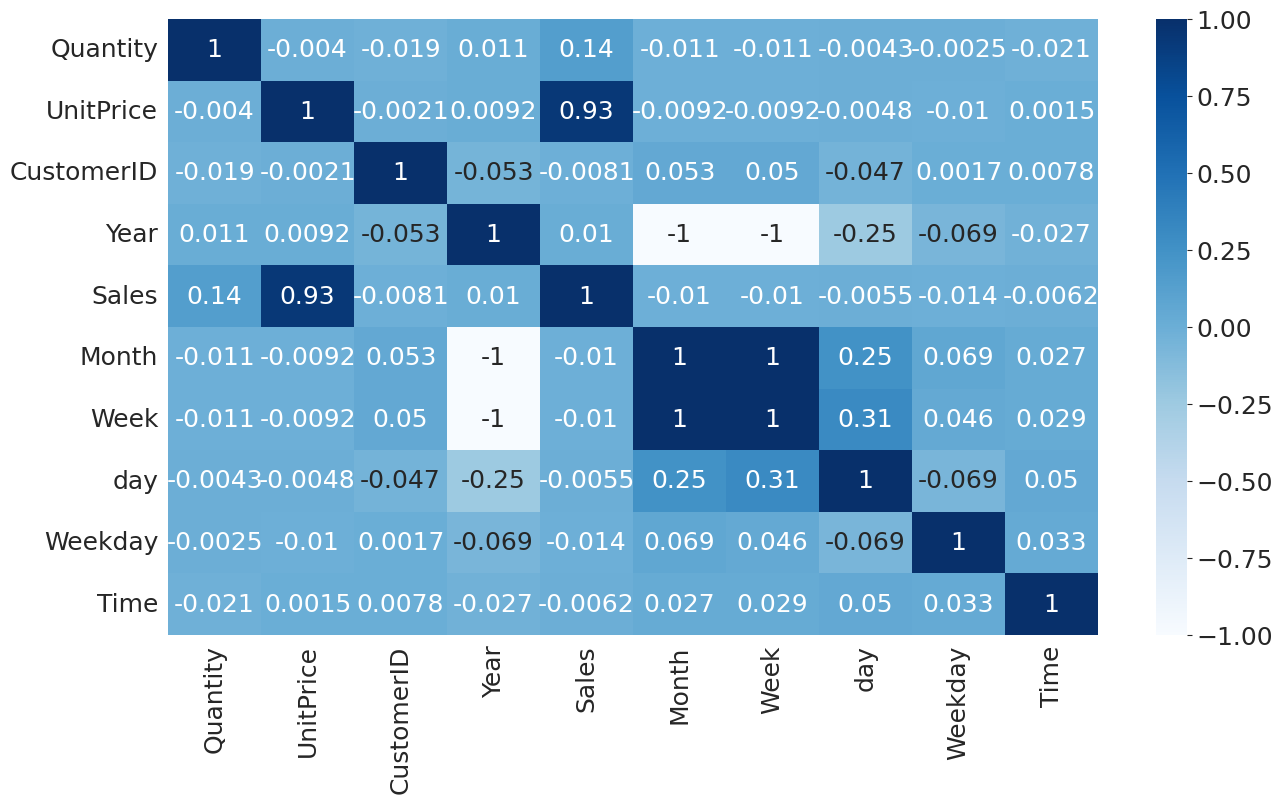

In [43]:
#heatmap for correation for variables
sns.heatmap(df_1.corr(), annot=True, cmap ="Blues")



*   Sales has Highest Correation with on UnitPrice
*   All Other variable has least correation with Sales Columns



# Explaratory Data Analysis (EDA)

# CustomerID with the highest Quantity

In [44]:
# sort the dataframe by Quantity in descending order
sorted_df = df_1.sort_values(by=['Quantity'], ascending=False)

# get the CustomerID with the highest Quantity
customer_id = sorted_df.iloc[0]['CustomerID']
highest_quantity = sorted_df.iloc[0]['Quantity']

print(f"CustomerID {customer_id}  bought the highest quantity of {highest_quantity}.")

CustomerID 15838.0  bought the highest quantity of 9360.0.


# Top 10 Customers by Quantity

In [45]:
customer_totals = df_1.groupby('CustomerID')['Quantity'].sum()

# sort the customer_totals by Quantity in descending order
sorted_totals = customer_totals.sort_values(ascending=False)

# get the top 10 customer IDs
top_10_customers = sorted_totals.head(10)

print("Top 10 Customers by Quantity:")
print(top_10_customers)

Top 10 Customers by Quantity:
CustomerID
15287.0    51822.0
15838.0     9910.0
15061.0     9171.0
17511.0     8368.0
16029.0     8004.0
14646.0     6714.0
18102.0     6695.0
13694.0     5596.0
14298.0     4976.0
12415.0     4662.0
Name: Quantity, dtype: float64


# Ploting between Top 10 Customers by Quantity

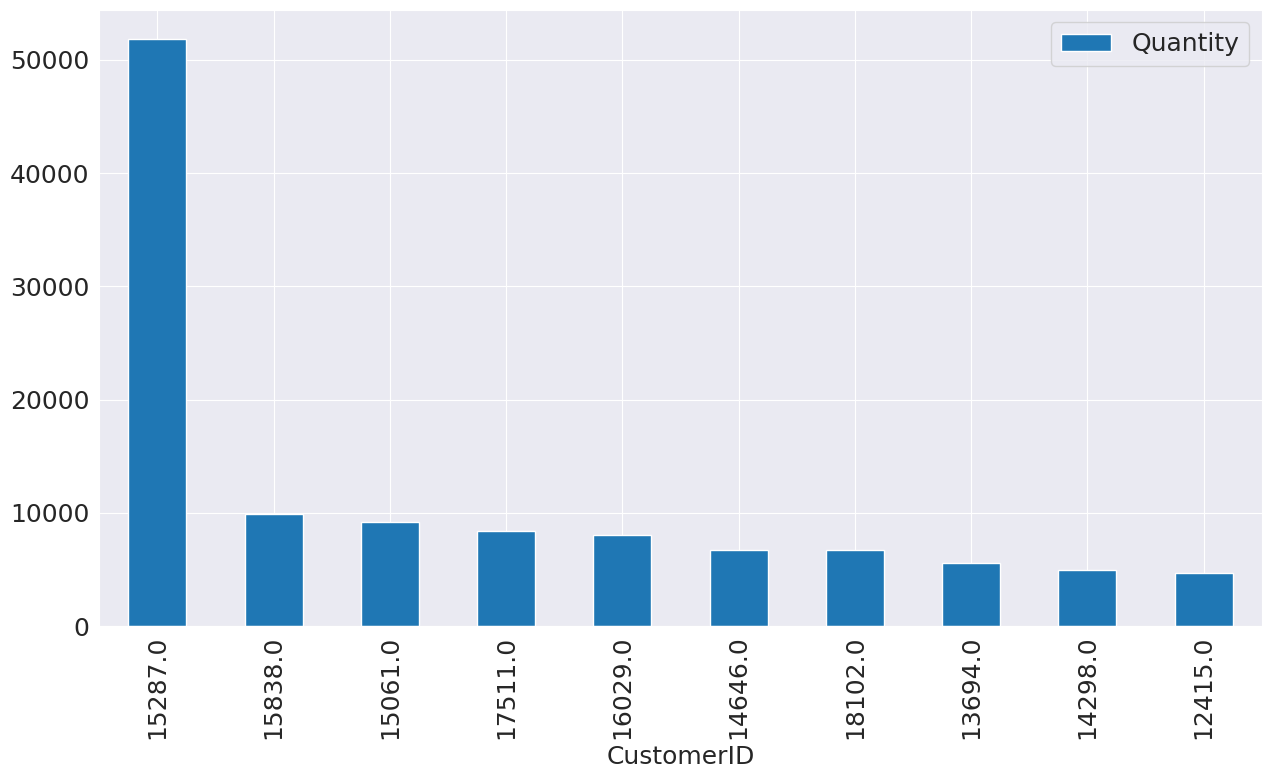

In [46]:
sorted_totals.head(10).plot(kind="bar")
plt.legend()
plt.show()

# Time of Day Barchart

In [47]:
fig = px.bar(data_frame = df_1.groupby(by=["Time of Day"]).size().reset_index(name="counts"),
            x="Time of Day", y="counts")
fig.show()

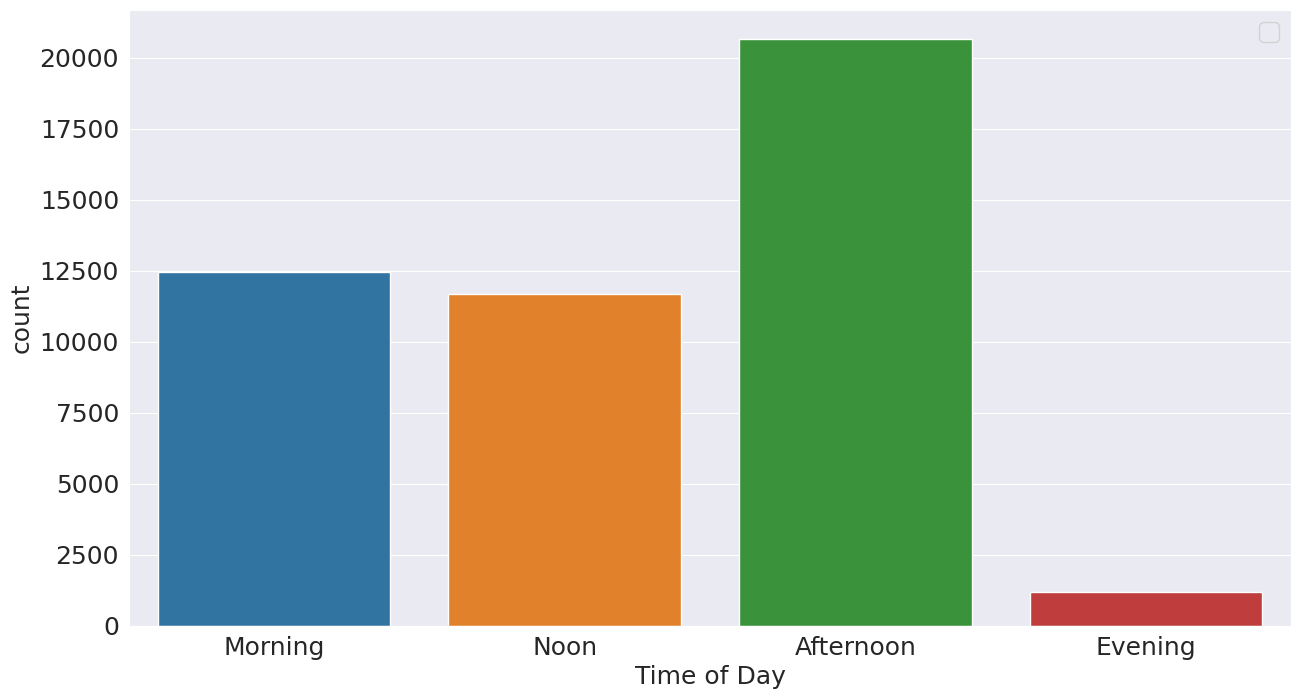

In [48]:
sns.countplot(data= df_1, x= "Time of Day")
plt.legend()
plt.show()

# Time of Day pieChart

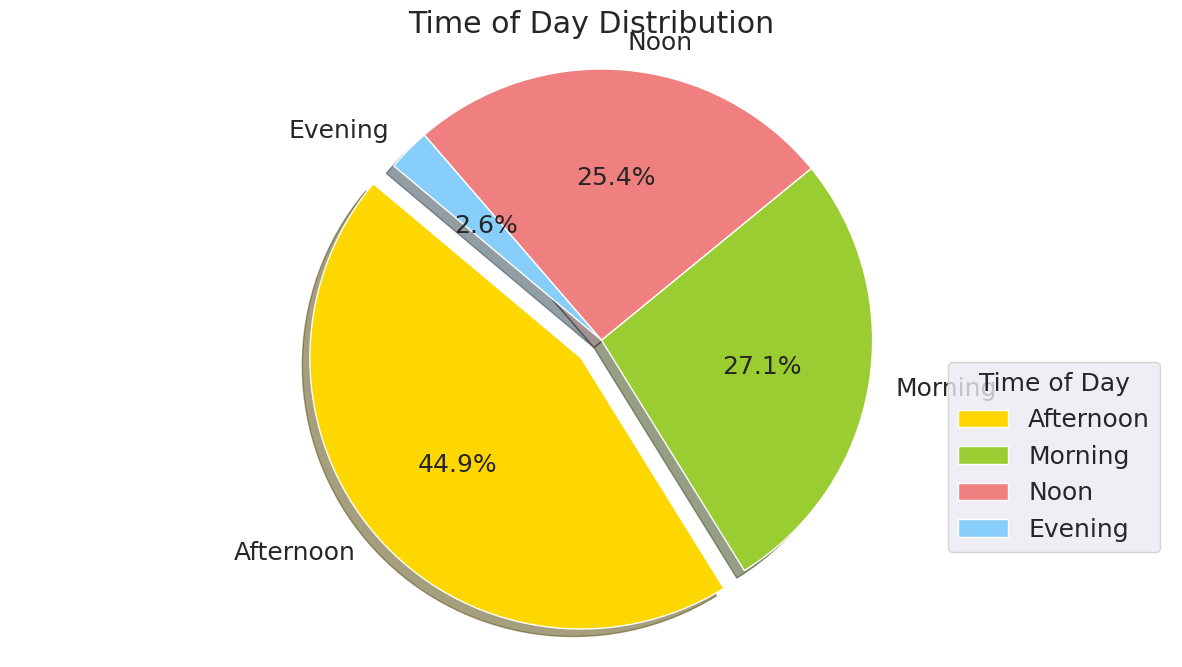

In [49]:
counts = df_1['Time of Day'].value_counts()

# Data
labels = counts.index.tolist()
sizes = counts.tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Time of Day Distribution')

plt.axis('equal')
plt.legend(title='Time of Day', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

# Time of Day Distribution Vs Sales

In [50]:
fig = px.bar(data_frame = df_1,
             x = 'Time of Day',
             y ="Sales")
fig.show()

In [51]:
fig = px.line(data_frame = df_1,
             x = 'Time of Day',
             y ="Sales")
fig.show()

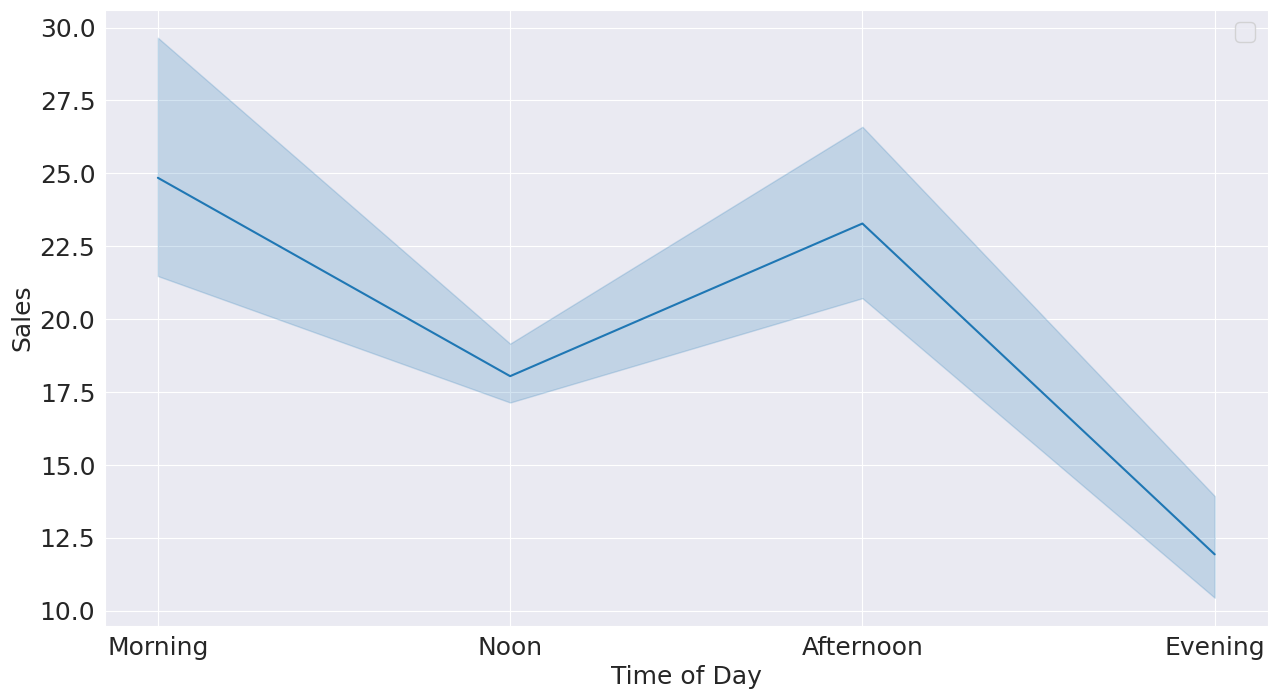

In [52]:
sns.lineplot(data= df_1,x="Time of Day", y ='Sales')
plt.legend()
plt.show()

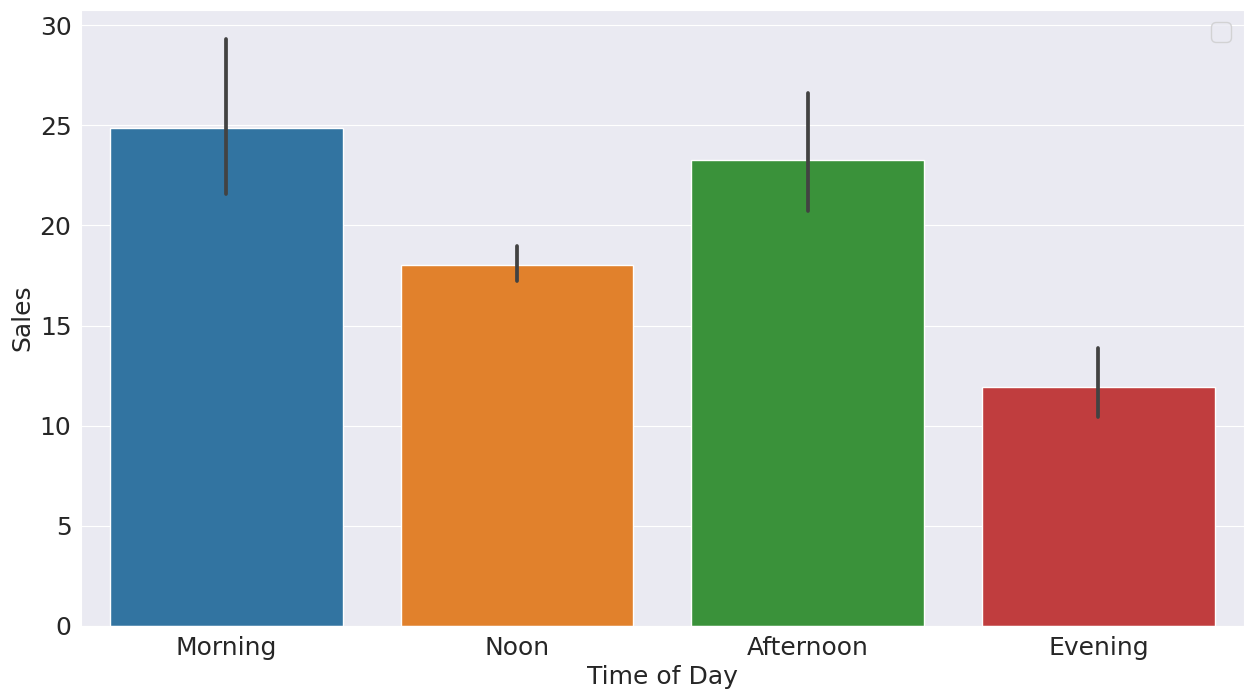

In [53]:
sns.barplot(data = df_1, x="Time of Day", y ='Sales')
plt.legend()
plt.show()

* During Morning time sales is maximum 
* In Afternoon sales is minimun

# Word Cloud of Description Columns

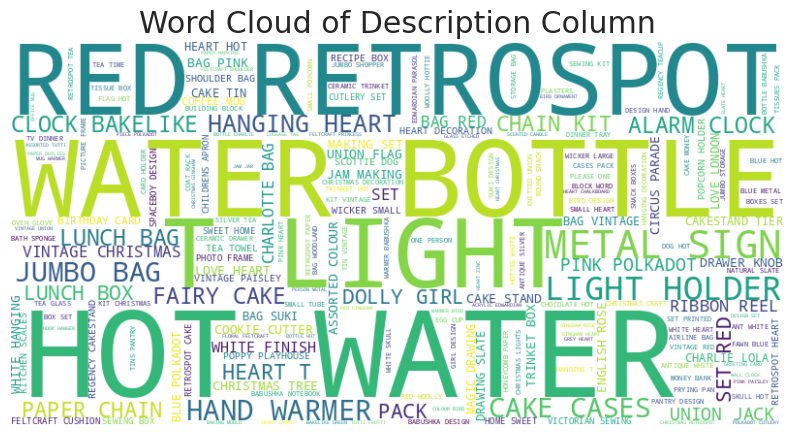

In [54]:
text = ' '.join(df_1['Description'].dropna().astype(str).values)

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Display the word cloud on the axis
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Word Cloud of Description Column')

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()


# Top 10 Product Descriptions

In [55]:
top_10_descriptions = df_1['Description'].value_counts().nlargest(10)

# Create a bar chart using Seaborn
fig = px.bar(x=top_10_descriptions.values, y=top_10_descriptions.index)
'''plt.xlabel('Count')
plt.ylabel('Description')
plt.title('Top 10 Product Descriptions')'''
fig.show()

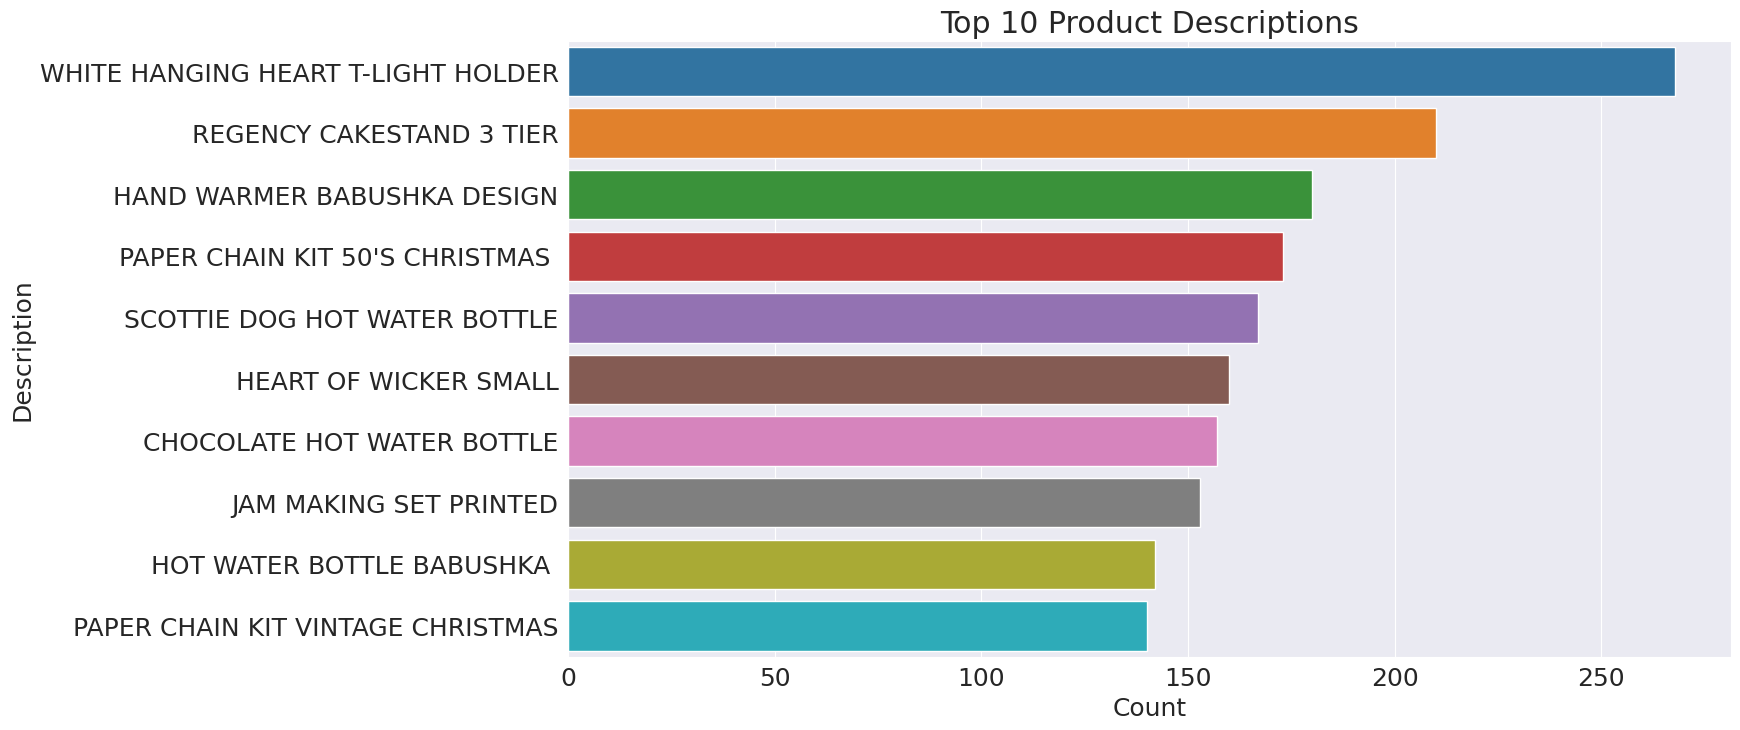

In [56]:
top_10_descriptions = df_1['Description'].value_counts().nlargest(10)

# Create a bar chart using Seaborn
sns.barplot(x=top_10_descriptions.values, y=top_10_descriptions.index)
plt.xlabel('Count')
plt.ylabel('Description')
plt.title('Top 10 Product Descriptions')
plt.show()

In [57]:
df_1

InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1        536365     71053                  WHITE METAL LANTERN       6.0   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...         ...       ...                                  ...       ...   
46757    540359     21080  SET/20 RED RETROSPOT PAPER NAPKINS       16.0   
46758    540359    84985A        SET OF 72 GREEN PAPER DOILIES       2.0   
46759    540359    84985A        SET OF 72 GREEN PAPER DOILIES       5.0   
46760    540359     21915               RED  HARMONICA IN BOX       12.0   
46761    540359     22133            PINK LOVE HEART SHAPE CUP      10.0   

               InvoiceDate  UnitPrice  CustomerID         Country  Year  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
46757  2011-01-06 15:29:00       0.85     18041.0  United Kingdom  2011   
46758  2011-01-06 15:29:00       1.45     18041.0  United Kingdom  2011   
46759  2011-01-06 15:29:00       1.45     18041.0  United Kingdom  2011   
46760  2011-01-06 15:29:00       1.25     18041.0  United Kingdom  2011   
46761  2011-01-06 15:29:00       0.85     18041.0  United Kingdom  2011   

       Sales  Month Month_Name_year_wise  Week  day  Weekday   Day_Name  Time  \
0      15.30     12             December    48    1        2  Wednesday     8   
1      20.34     12             December    48    1        2  Wednesday     8   
2      22.00     12             December    48    1        2  Wednesday     8   
3      20.34     12             December    48    1        2  Wednesday     8   
4      20.34     12             December    48    1        2  Wednesday     8   
...      ...    ...                  ...   ...  ...      ...        ...   ...   
46757  13.60      1              January     1    6        3   Thursday    15   
46758   2.90      1              January     1    6        3   Thursday    15   
46759   7.25      1              January     1    6        3   Thursday    15   
46760  15.00      1              January     1    6        3   Thursday    15   
46761   8.50      1              January     1    6        3   Thursday    15   

      Time of Day  
0         Morning  
1         Morning  
2         Morning  
3         Morning  
4         Morning  
...           ...  
46757   Afternoon  
46758   Afternoon  
46759   Afternoon  
46760   Afternoon  
46761   Afternoon  

[45959 rows x 18 columns]

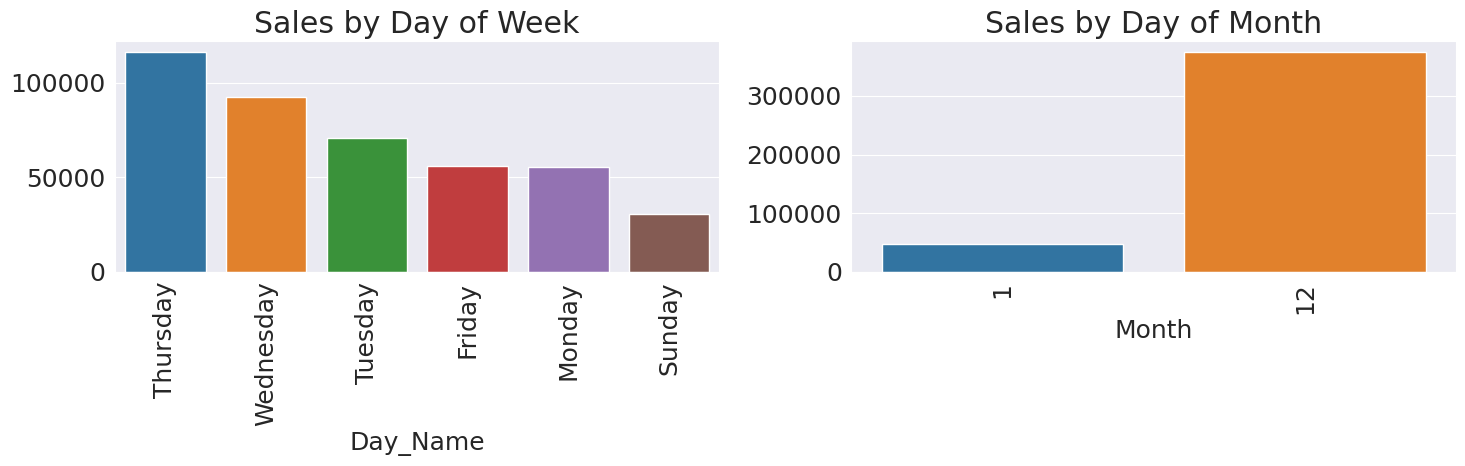

In [58]:
sales_by_day_of_week = df_1.groupby('Day_Name')['Quantity'].sum().sort_values(ascending=False)

sales_by_day_of_month = df_1.groupby('Month')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values)
plt.title('Sales by Day of Week')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x=sales_by_day_of_month.index, y=sales_by_day_of_month.values)
plt.title('Sales by Day of Month')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

* Thrusday and Tuesday has highest sales in weeks
* November has higest sales in month 

Country
United Kingdom    368626.0
Germany             7080.0
Netherlands         6811.0
EIRE                6271.0
France              6000.0
Australia           5272.0
Sweden              4488.0
Japan               4093.0
Norway              3582.0
Belgium             1756.0
Name: Quantity, dtype: float64


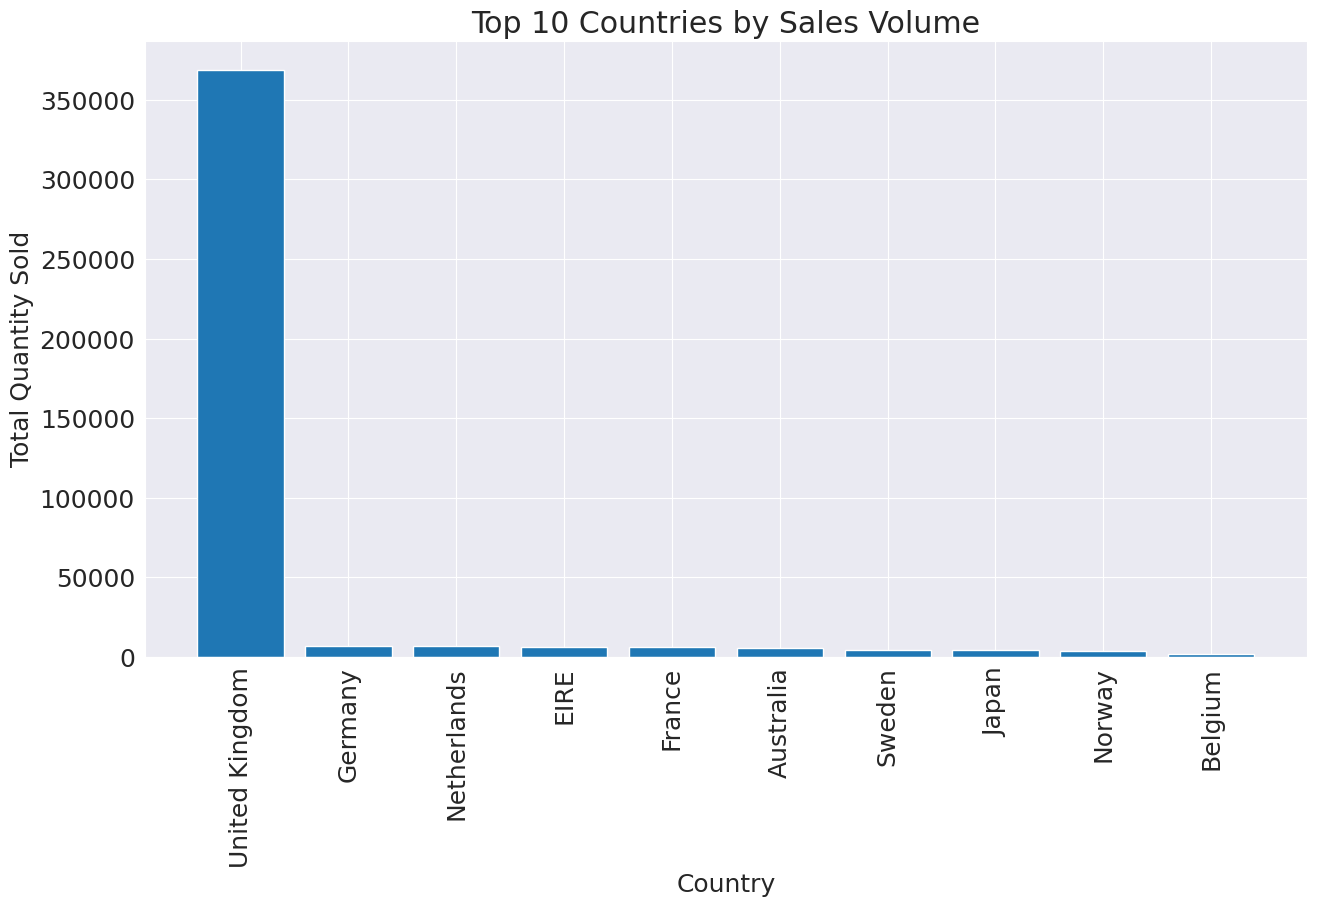

In [59]:
# Grouping data by country and calculating total sales
grouped_df = df_1.groupby('Country')['Quantity'].sum()

# Sorting data in descending order and selecting the first 10 values
top_10_countries = grouped_df.sort_values(ascending=False)[:10]
print(top_10_countries)

# Plotting
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Countries by Sales Volume')
plt.show()

* United Kingdom(UK) has higest number of goods sold
* Netherland, EIRE, Germany has almost same no of goods sold
* Japan and spain has least number of goods sold

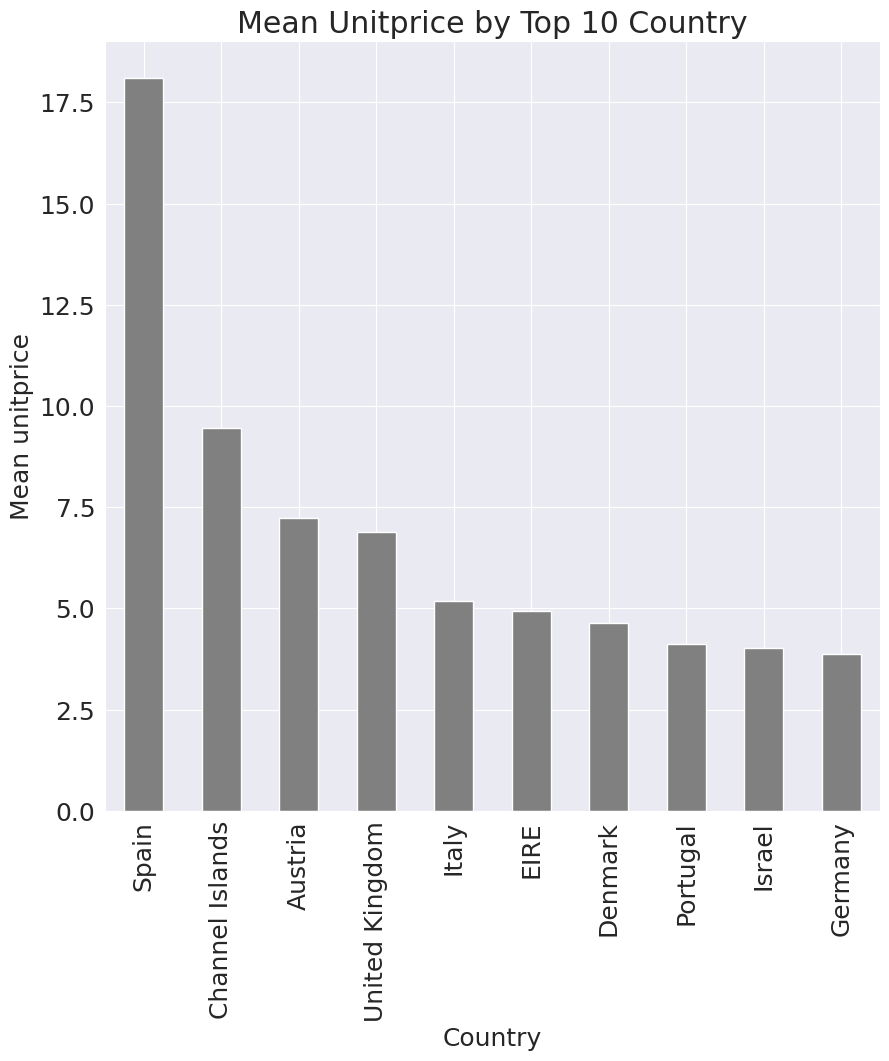

In [60]:
# unitprice vs Country
# Grouping data by country and calculating total sales
# Sorting data in descending order and selecting the first 10 values
mean_quantity_by_country = df_1.groupby('Country')['UnitPrice'].mean().sort_values(ascending =False)[:10]
plt.figure(figsize=(10, 10))
mean_quantity_by_country.plot(kind='bar', color ='Grey')
plt.xticks(rotation=90)
plt.title('Mean Unitprice by Top 10 Country')
plt.xlabel('Country')
plt.ylabel('Mean unitprice')
plt.show()

* Singapore has higest average unit price 
* Hongkong has second highest unit price 
* while canada, Norway, Finland, Lebanon, Malta has similar averger unit price

# Sales Distribution
1. Which country have the most transaction sales?
2. Which year that have the most sales?
3. Which month that have the most sales?
4. Which day that have the most sales?
5. Top 10 item that have the most sales.
6. Sales Vs Time


# which country has higest sales

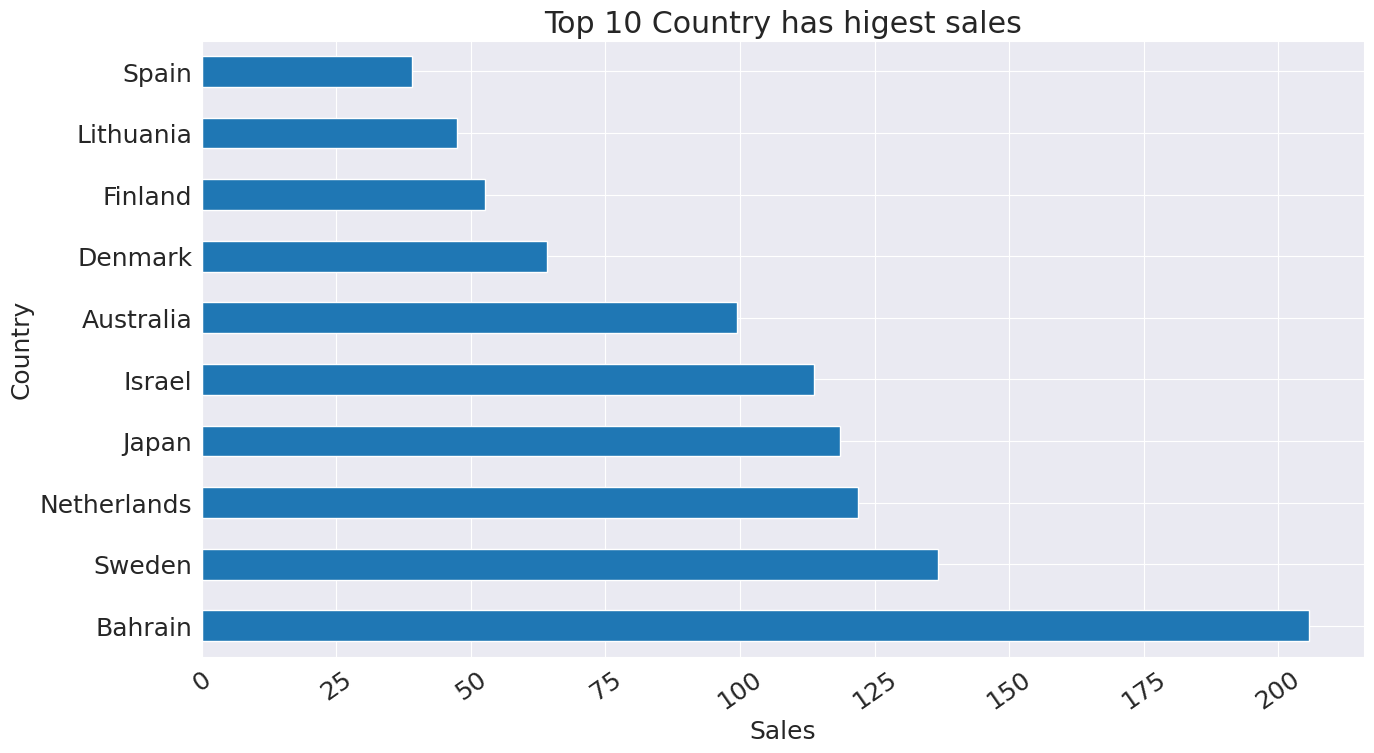

In [61]:
# 1. which country has higest sales
df_country = df_1.groupby('Country')['Sales'].mean().sort_values(ascending =False)[:10]
df_country.plot(kind='barh')
plt.title("Top 10 Country has higest sales")
plt.xlabel('Sales')
plt.xticks(rotation=35)
plt.show()

* Singapore has higest sales 
* Netherlands has 2nd highest sales
* Japan and Australia has similar sales 
* Baharin, Denmark, lithuania has least sales 

# Which year that have the most sales?

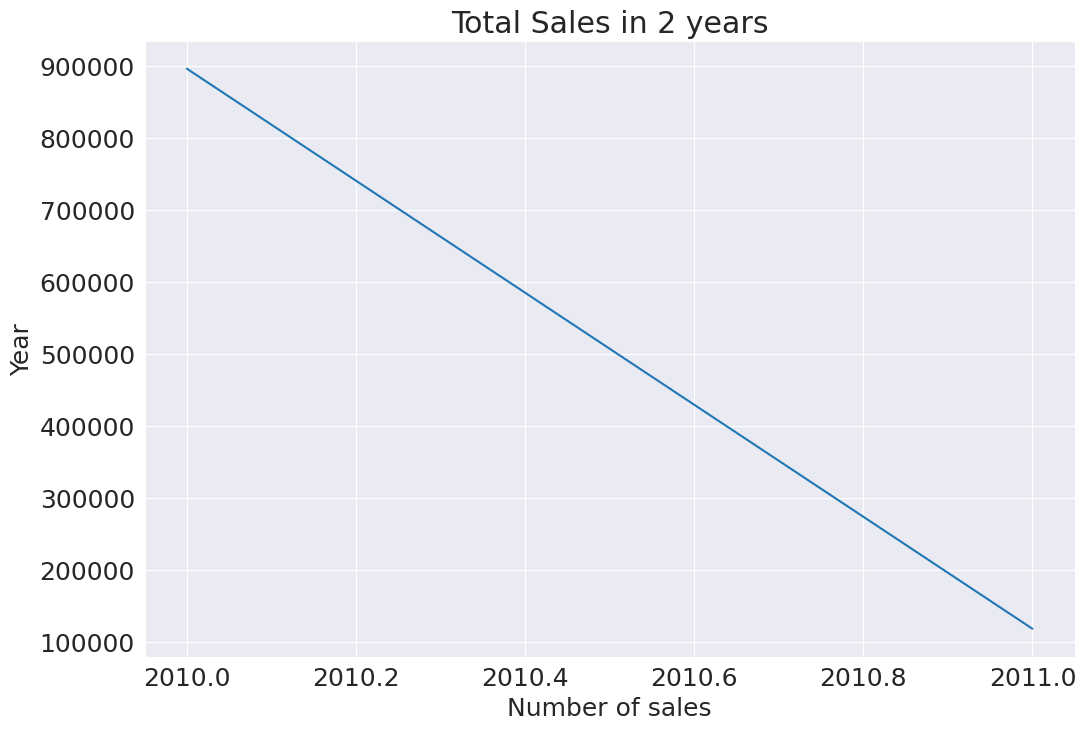

In [62]:
df_year = df_1.groupby(by=['Year']).sum()['Sales'].plot(kind='line',figsize=(12,8))
plt.title('Total Sales in 2 years')
plt.xlabel('Number of sales')
plt.ylabel('Year')
plt.show()

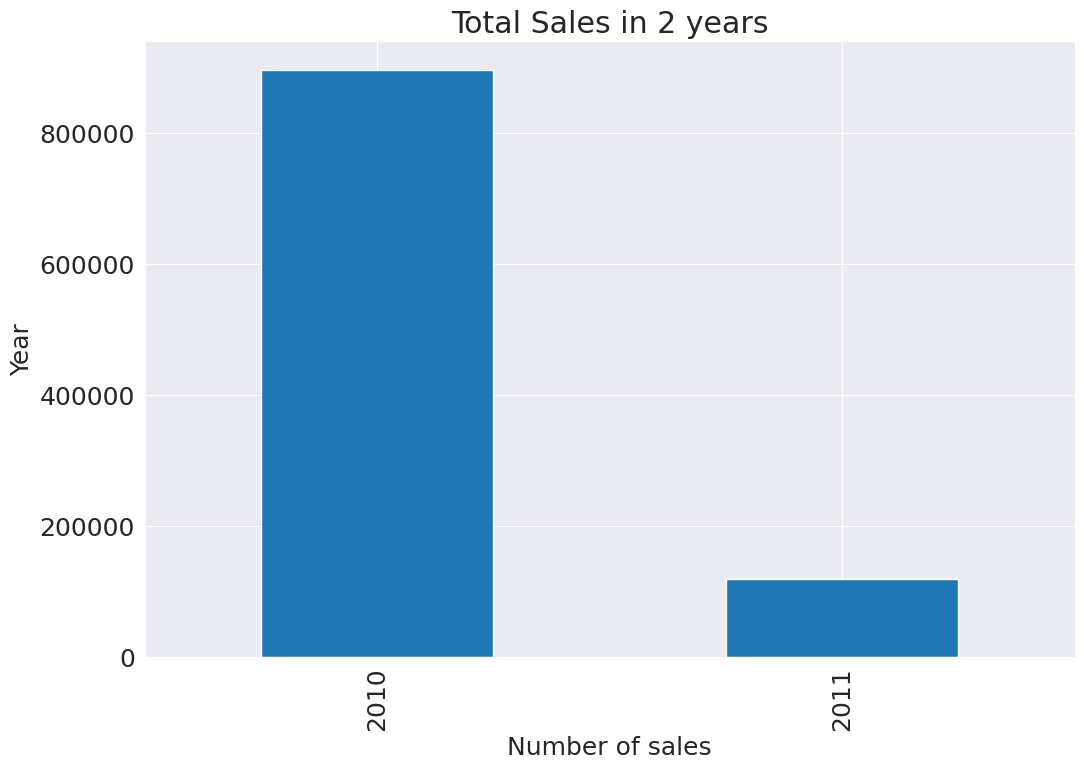

In [63]:
df_year = df_1.groupby(by=['Year']).sum()['Sales'].plot(kind='bar',figsize=(12,8))
plt.title('Total Sales in 2 years')
plt.xlabel('Number of sales')
plt.ylabel('Year')
plt.show()

* 2011 has higest sales as compare to 2010
* sales growth is linearly straight line W.R.T Year

# Which month that have the most sales?

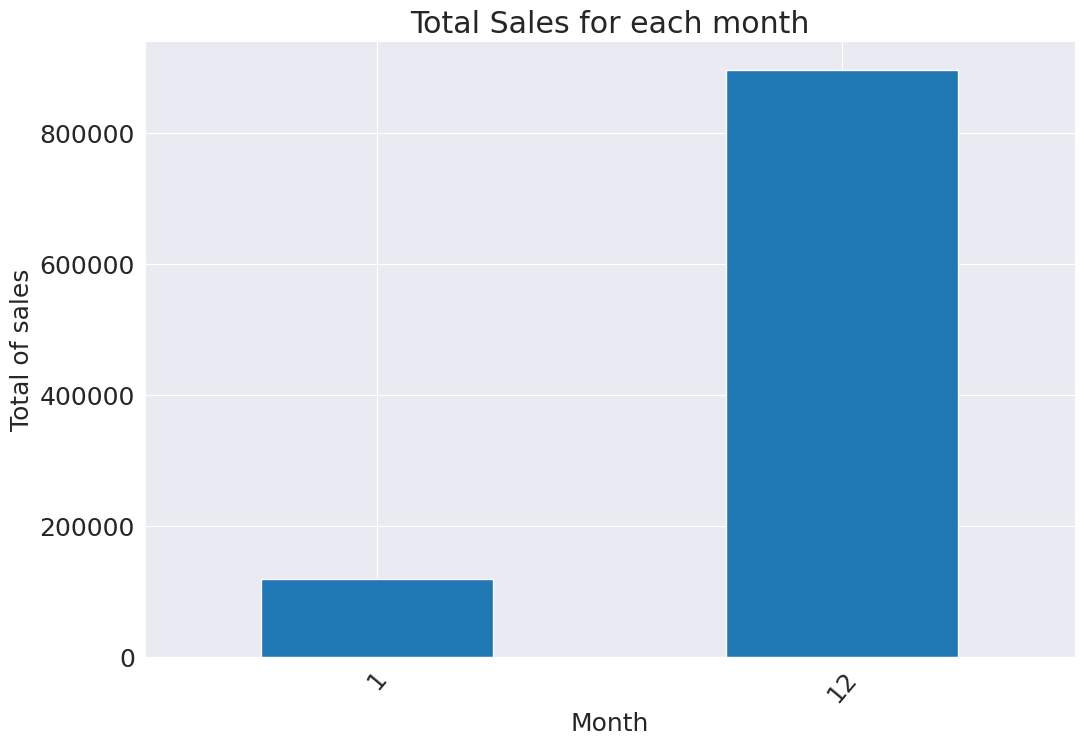

In [72]:
df_month = df_1.groupby(by=['Month']).sum()['Sales'].plot(kind='bar',figsize=(12,8))
plt.title('Total Sales for each month')
plt.ylabel('Total of sales')
plt.xlabel('Month')
plt.xticks(rotation=50)
plt.show()

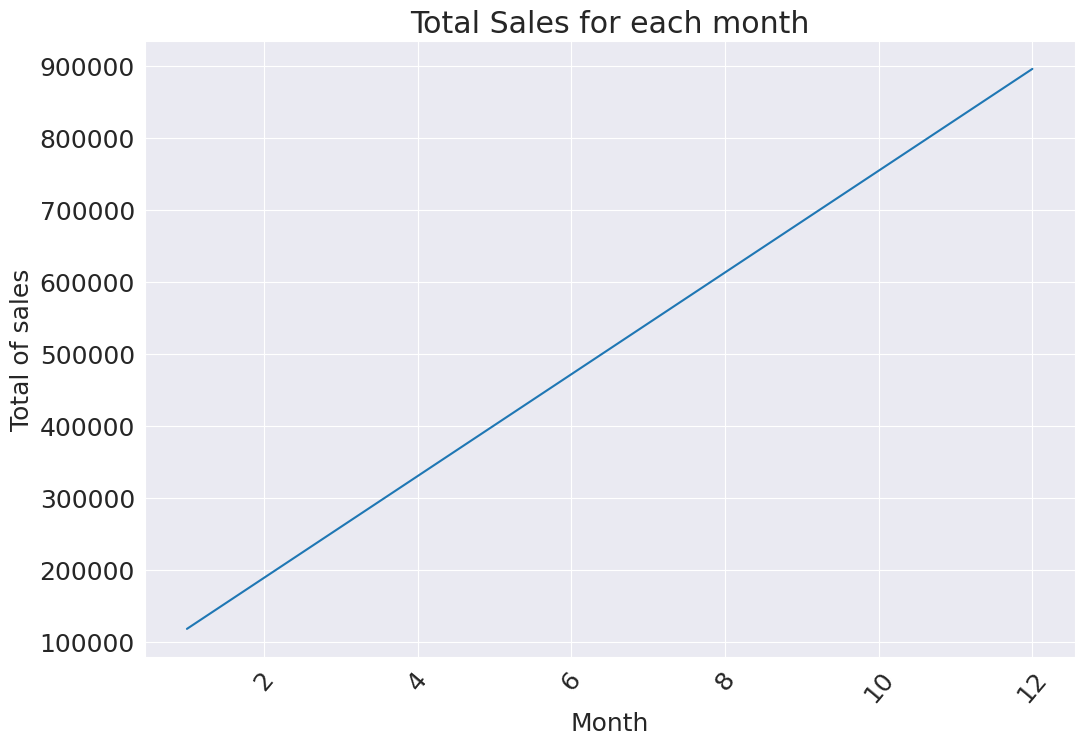

In [71]:
df_month = df_1.groupby(by=['Month']).sum()['Sales'].plot(kind='line',figsize=(12,8))
plt.title('Total Sales for each month')
plt.ylabel('Total of sales')
plt.xlabel('Month')
plt.xticks(rotation=50)
plt.show()

# Which day that have the most sales?

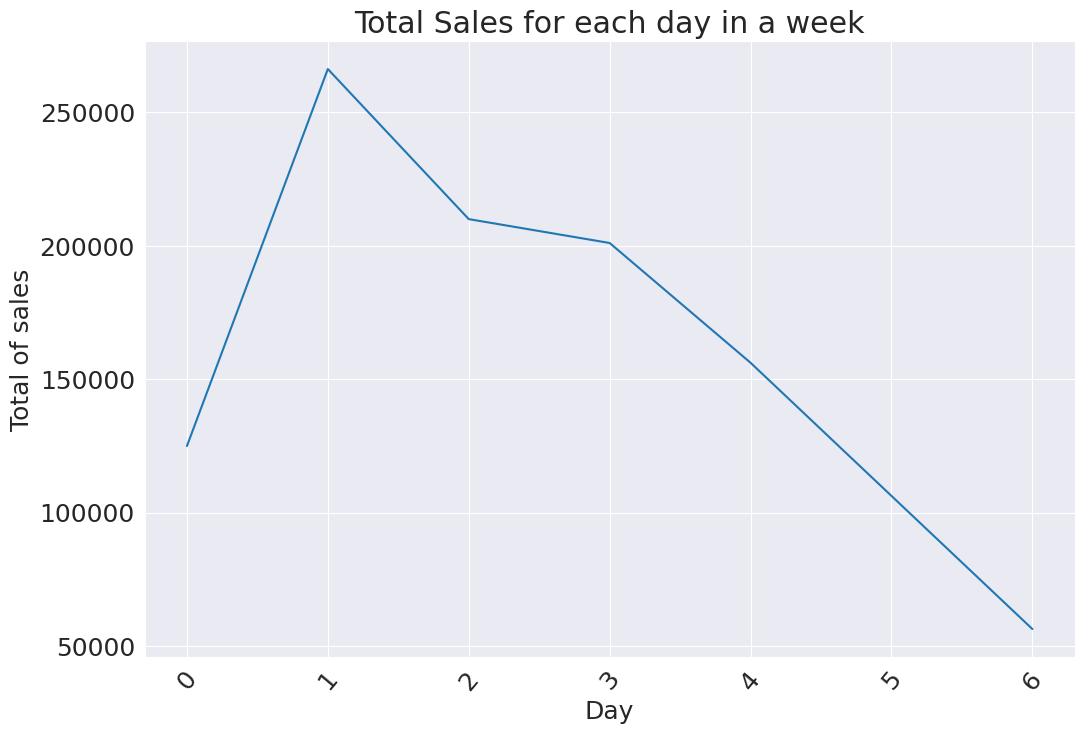

In [79]:
df_dayofweek = df_1.groupby(by=['Weekday']).sum().sort_values('Weekday',ascending=True)['Sales'].plot(kind='line',figsize=(12,8))
plt.title('Total Sales for each day in a week')
plt.ylabel('Total of sales')
plt.xlabel('Day')
plt.xticks(rotation=50)
plt.show()

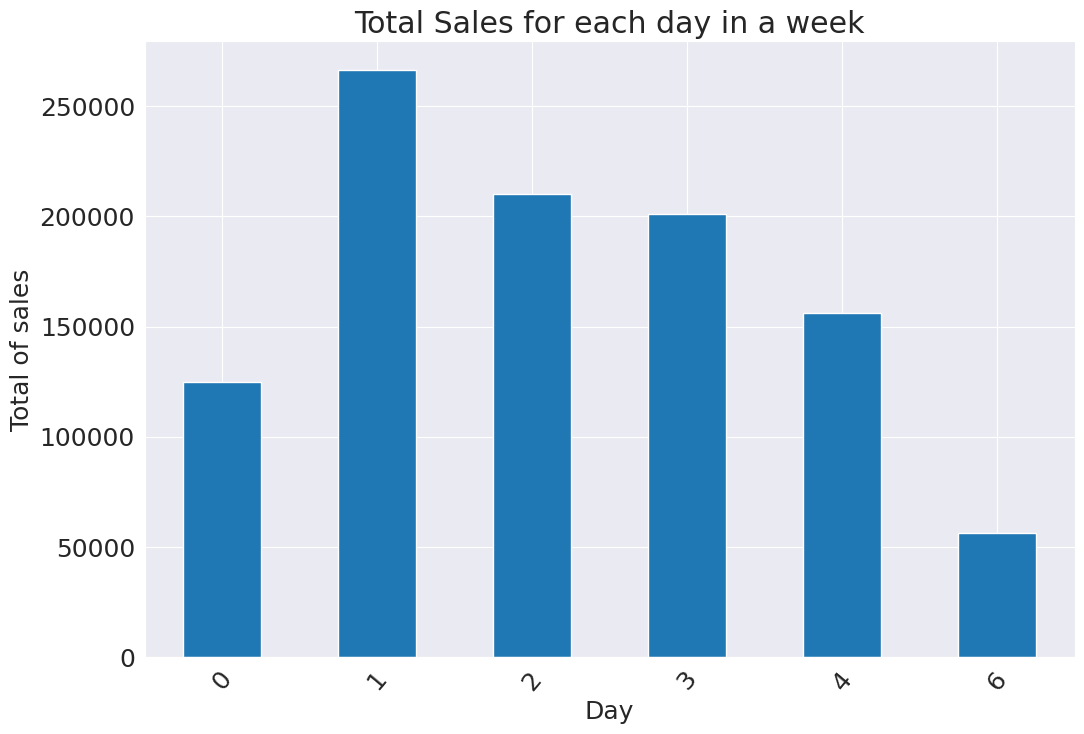

In [80]:
df_dayofweek = df_1.groupby(by=['Weekday']).sum().sort_values('Weekday',ascending=True)['Sales'].plot(kind='bar',figsize=(12,8))
plt.title('Total Sales for each day in a week')
plt.ylabel('Total of sales')
plt.xlabel('Day')
plt.xticks(rotation=50)
plt.show()

# Top 10 item that have the most sales in each yeaR

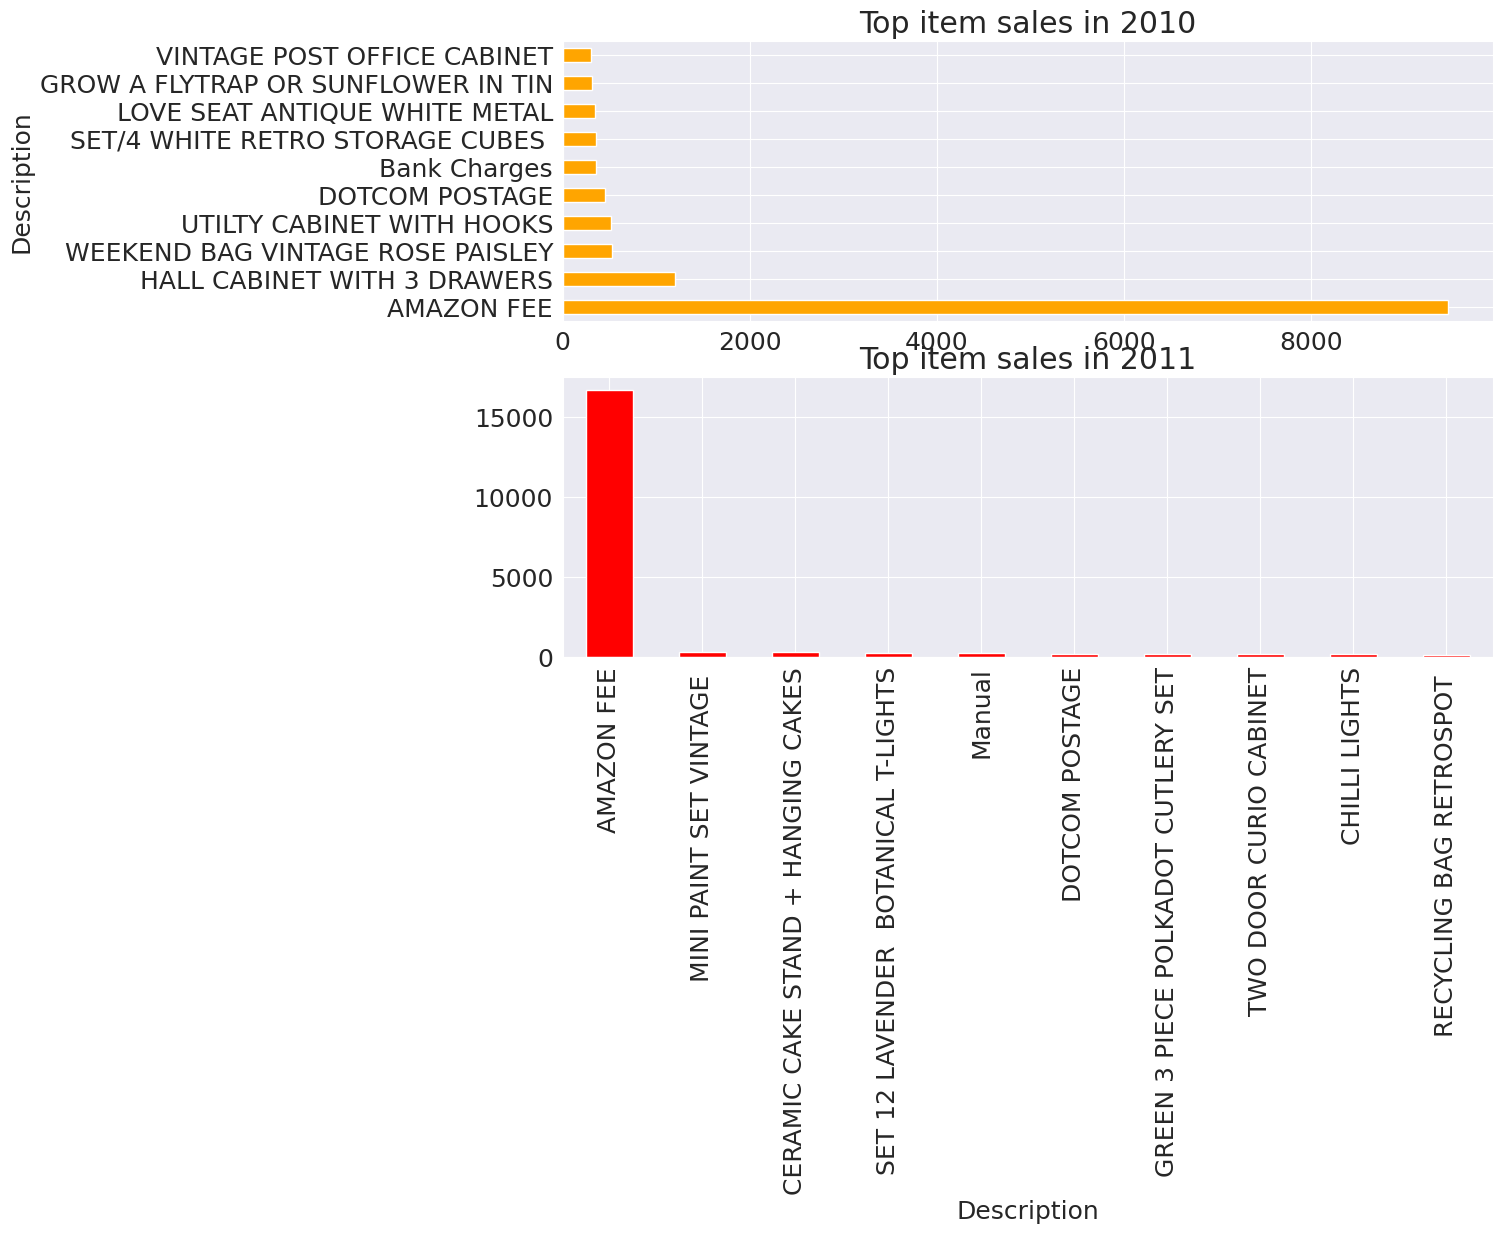

In [84]:
plt.subplot(2,1,1)
# creating the bar plot
df_sales_item_2010 = df_1.groupby(['Description','Year']).mean()
df_sales_item_2010 = df_sales_item_2010.unstack('Year')['Sales']
df_sales_item_2010 = df_sales_item_2010.sort_values(2010,ascending=False)[2010].head(10).plot(kind='barh',color ='Orange',figsize=(12,8))
plt.title("Top item sales in 2010")
plt.subplot(2,1,2)
df_sales_item_2011 = df_1.groupby(['Description','Year']).mean()
df_sales_item_2011 = df_sales_item_2011.unstack('Year')['Sales']
df_sales_item_2011 = df_sales_item_2011.sort_values(2011,ascending=False)[2011].head(10).plot(kind='bar',color ="Red", figsize=(12,8))

plt.title("Top item sales in 2011")
plt.show()

# Top 10 most purchased item

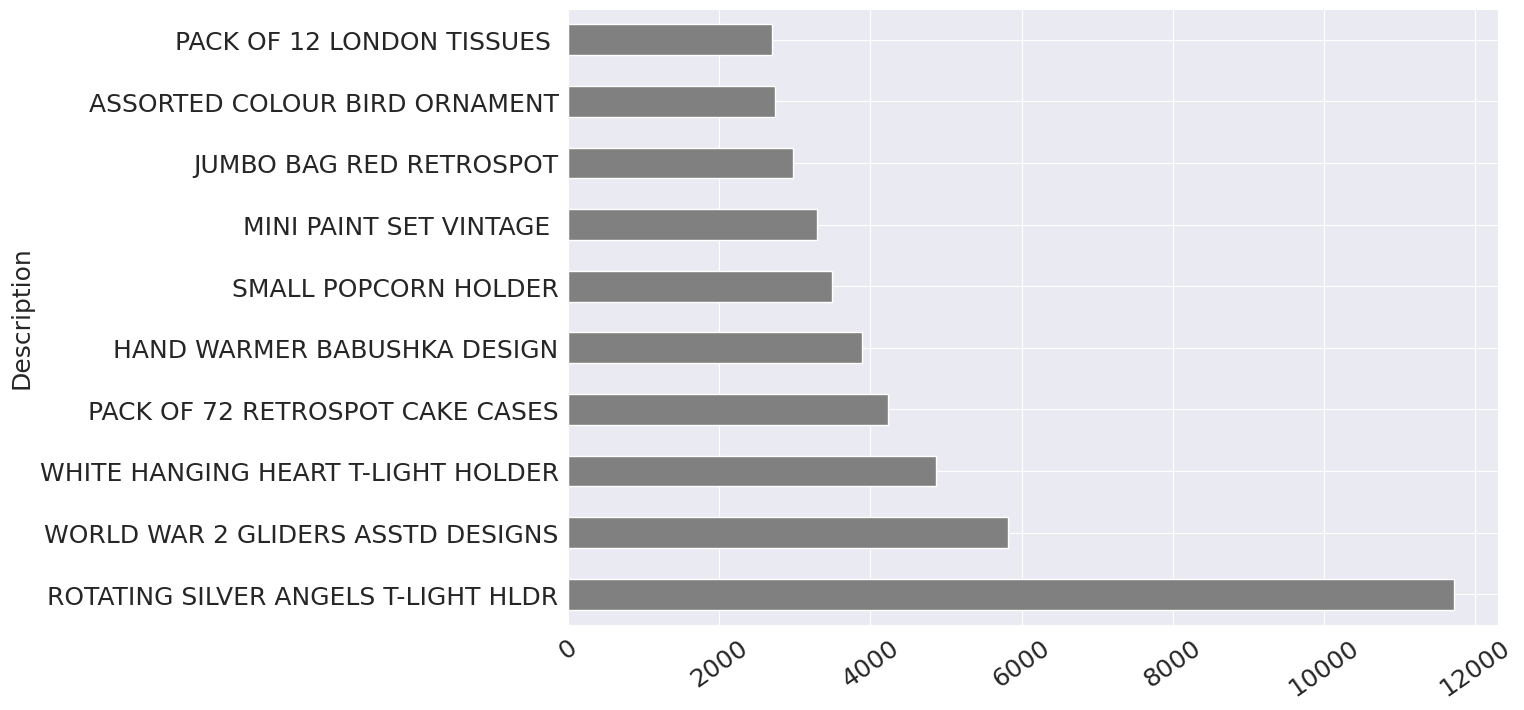

In [85]:
df_purchased_item = df_1.groupby('Description').sum()
df_purchased_item = df_purchased_item.sort_values('Quantity',ascending=False).head(10)
df_purchased_item['Quantity'].plot(kind = 'barh',color ="Grey", figsize=(12,8))
plt.xticks(rotation=35)
plt.show()

# How much average sales for all transaction(each invoice)

In [87]:
df_invoice = df_1.groupby(by=['InvoiceNo']).sum()[['Sales','Quantity']]
px.box(df_invoice)

In [92]:
num_cols = df_1.select_dtypes(include =['int', 'float']).columns

In [93]:
num_cols

Index(['Quantity', 'UnitPrice', 'CustomerID', 'Year', 'Sales', 'Month', 'Week',
       'day', 'Weekday', 'Time'],
      dtype='object')

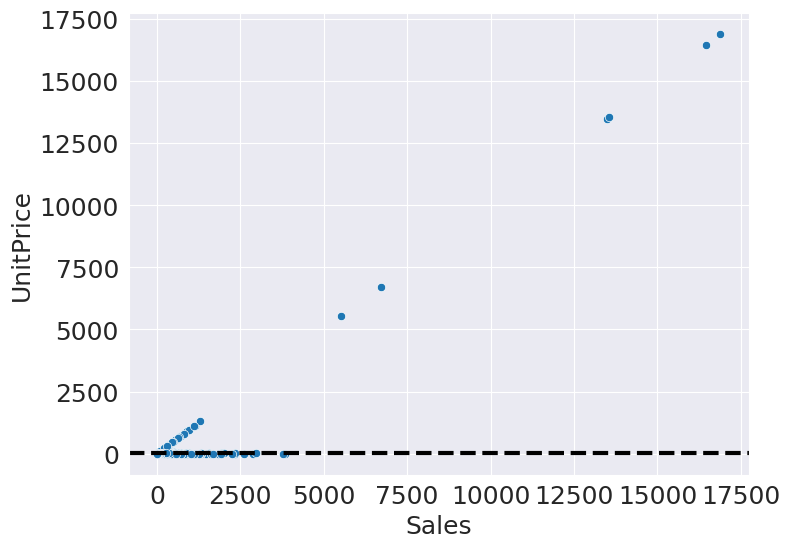

In [98]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df_1, x="Sales", y="UnitPrice")
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.show()

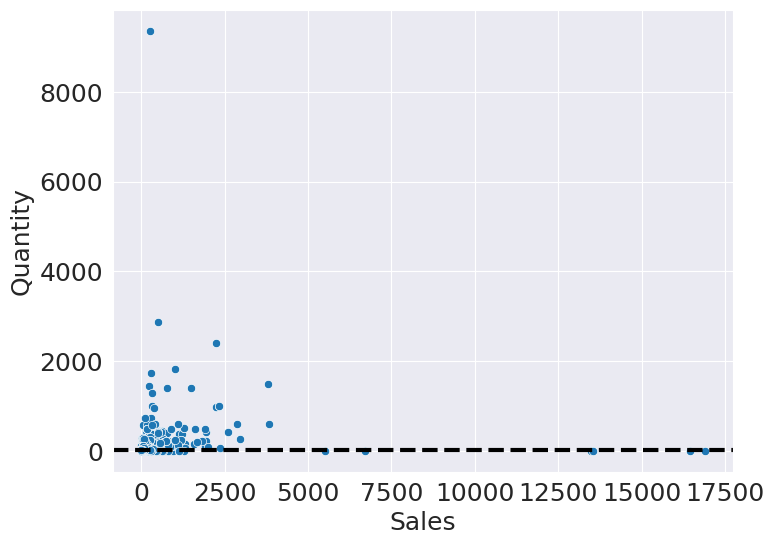

In [99]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df_1, x="Sales", y="Quantity")
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.show()